In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../modules/')
from correlation_analysis import *

In [2]:
subjs = [5,6,9,11,12,13,16,17,18,19,21,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71]
subjs_new = [14, 20, 22, 27, 28, 29, 31, 41, 46, 64, 70]

subjs += subjs_new
subjs = np.sort(subjs)

In [3]:
%%time

nlag = 20000
tcorr = []
rejected_list = []
accepted_list = []
for i, subj in enumerate(subjs):
    data1, data2, ch = load_and_match_data(subj)
    n_ch = len(ch)
    tcorr_subj = np.zeros((2, n_ch))

    if n_ch >= 5:
        for j, data in enumerate((data1, data2)):
            autocorr = find_autocorr(data, nlag = nlag)
            tcorr_subj[j] = fit_envelope_autocorr(autocorr)
        tcorr.append([subj, ch, tcorr_subj])
        accepted_list.append(subj)
    else:
        print(f"Subject {subj} rejected ({n_ch})")
        rejected_list.append(subj)

print(len(rejected_list))

../modules/correlation_analysis.py:172: RuntimeWarning: overflow encountered in exp
  return a*(np.exp(-t/tau) - 1) + 1
/home/giorgio/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Subject 13 rejected (0)


../modules/correlation_analysis.py:172: RuntimeWarning: overflow encountered in multiply
  return a*(np.exp(-t/tau) - 1) + 1


Subject 20 rejected (0)
Subject 21 rejected (1)
Subject 25 rejected (2)
Subject 28 rejected (3)
Subject 29 rejected (2)
Subject 31 rejected (4)
Subject 34 rejected (0)
Subject 39 rejected (4)
Subject 57 rejected (2)
Subject 60 rejected (0)
Subject 63 rejected (1)
Subject 65 rejected (0)
Subject 69 rejected (3)
Subject 70 rejected (0)
15
CPU times: user 24.3 s, sys: 427 ms, total: 24.7 s
Wall time: 24.7 s


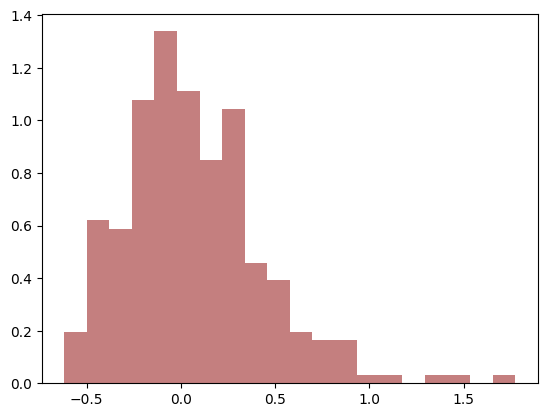

In [4]:
data = tcorr.copy()
ratios = [(data[2][1] - data[2][0])/data[2][0] for data in tcorr]
ratios_max = np.argmax([np.max(i) for i in ratios])
data = np.concatenate(ratios)
_, bins, _ = plt.hist(data, bins = 20, density = True, color = "darkred", alpha = 0.5)
np.save("../data/histogram_data.npy", data)

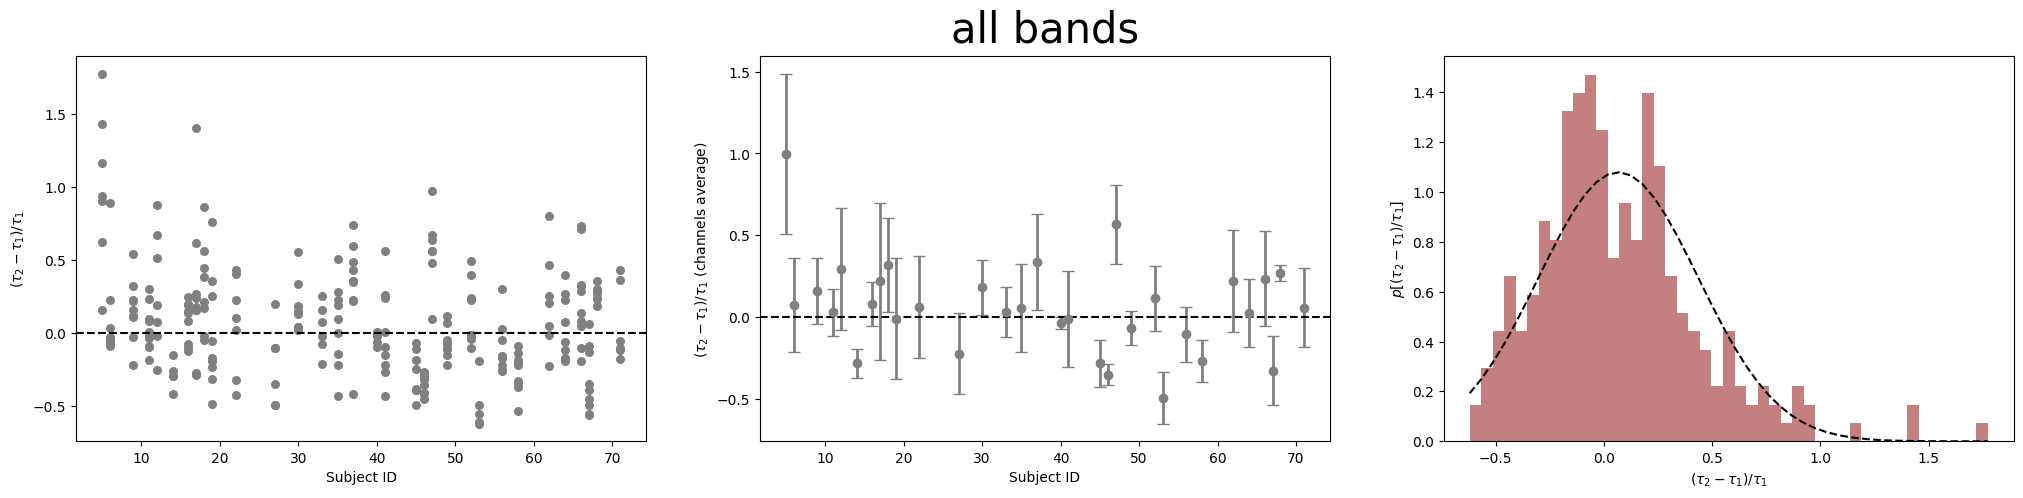

In [12]:
plot_band_results(tcorr, title = f"all bands")

In [5]:
scipy.stats.skew(data), scipy.stats.skewtest(data, alternative='greater')

(1.0454568399439215,
 SkewtestResult(statistic=5.9077836353304685, pvalue=1.7337050174192533e-09))

In [6]:
scipy.stats.kurtosis(data), scipy.stats.kurtosistest(data, alternative='greater')

(2.1853783587597704,
 KurtosistestResult(statistic=4.1055950355903805, pvalue=2.0163772057117527e-05))

In [7]:
subj = subjs[0]
nlag = 10000
data1, data2, ch = load_and_match_data(subj)

autocorr1 = find_autocorr(data1, nlag = nlag)
autocorr2 = find_autocorr(data2, nlag = nlag)
np.save(f"../data/autocorr1_subj{subj}.npy", autocorr1)
np.save(f"../data/autocorr2_subj{subj}.npy", autocorr2)